<a href="https://colab.research.google.com/github/itspopoy57/Machinelearning/blob/main/01_neural_network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00 Regression problems


## intro to regression

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

##Create data to view and fit


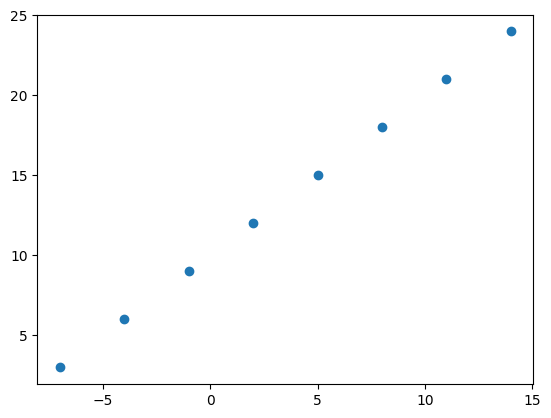

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#create the features
#capital variables when making the matrix or tensor
X = np.array([-7.0, -4.0 , -1.0 , 2.0, 5.0, 8.0, 11.0, 14.0 ])

#creating the labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0,])

#visualize it
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
y.shape , X.shape

((8,), (8,))

##Input Output shapes

lets create a demo tensor for our housing prediction prolbem

In [5]:
house_info = tf.constant(["bedroom" , "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
#turn all our numpy array to tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X.ndim, y.ndim, X.shape, y.shape

(1, 1, TensorShape([8]), TensorShape([8]))

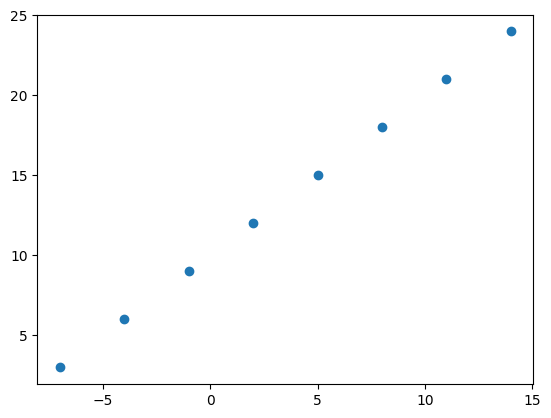

In [8]:
plt.scatter(X, y)

##Steps on Modeling on tensorFlow

here
1. **Creating a Model** - Define the input and output Layers, as well as
    Hidden layers of a deep learning model
2.** Compile the model**
  - define the loss function ( the function that tell use how wrong it is) and the Optimizer (tells our model how to improve and patters our samples / Model) and Evaluation metrics ( to interpret the performance of our model)

3. **Fitting a Model **- letting the models find patters between X & y
  or Features and labels.



In [9]:
from keras.engine.sequential import Sequential
from keras.api._v2 import keras
#set random Seed
tf.random.set_seed(42)

# 1 create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    #we put one because we want to get to predict 1 number and return 1 number
    #or input one number then predict one number
])

#or you can do it like this
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

# 2. Compile
model.compile(loss=tf.keras.losses.mae, #mae is mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #STG is short for stochastic gradient descent
              metrics=["mae"])


# 3. Fit the model for 5 laps
    #model.fit(X, y , epochs=5) - have to change this because of the update 2.7+
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 10.2908 - mae: 10.2908
Epoch 2/5
1/1 [==============================] - 0s 27ms/step - loss: 10.1583 - mae: 10.1583
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 10.0258 - mae: 10.0258
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 9.8933 - mae: 9.8933
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 9.7608 - mae: 9.7608


In [10]:
#check X, y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
#try to make a prediction using our trained model
# the input is X we  predicting y so the 17 is X
y_pred  = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 276ms/step


array([[18.612425]], dtype=float32)

now that is wrong lol


##Now we have to know how to improve the model

1. we can improve our model by altering the steps we tppk
to create a  model.

    - increase the the number of the hiddenlayers change the
      activation fuction of each layer
    -
2. compiling a model
    - we might change the optimization function or perhaps the learning rate

3. fitting a model
    - epochs -- leave it training for longer

In [12]:
from keras.engine.training import optimizer
from keras.engine.sequential import Sequential
from keras.api._v2 import keras

# redoing it here

#Step 1 :

modelp2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#step 2:
modelp2.compile(loss=tf.keras.losses.mae,
                #optimizer=tf.keras.optimizers.SGD(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["mae"])

#step 3
  #x = input , y = output , epoch
modelp2.fit(tf.expand_dims(X, axis=-1), y, epochs=500)



Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 12.7149 - mae: 12.7149
Epoch 2/500
1/1 [==============================] - 0s 27ms/step - loss: 11.3076 - mae: 11.3076
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 9.8518 - mae: 9.8518
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 8.2864 - mae: 8.2864
Epoch 5/500
1/1 [==============================] - 0s 27ms/step - loss: 7.4335 - mae: 7.4335
Epoch 6/500
1/1 [==============================] - 0s 16ms/step - loss: 8.0580 - mae: 8.0580
Epoch 7/500
1/1 [==============================] - 0s 19ms/step - loss: 8.1954 - mae: 8.1954
Epoch 8/500
1/1 [==============================] - 0s 20ms/step - loss: 7.8120 - mae: 7.8120
Epoch 9/500
1/1 [==============================] - 0s 32ms/step - loss: 7.2936 - mae: 7.2936
Epoch 10/500
1/1 [==============================] - 0s 21ms/step - loss: 7.1843 - mae: 7.1843
Epoch 11/500
1/1 [==============================] - 0s 22ms/step - 

In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
y_pred123 = modelp2.predict([17.0])
y_pred123

1/1 [==============================] - 0s 213ms/step


array([[26.769676]], dtype=float32)

##typical work flow with neural networks

make the model -> fit it -> evaluate it
-> twick it -> fit it -> evaluate it -> twick that model
-> fit it -> evalua...

for evaluations of model --> visualize , visualize, VISUALIZE!

In [15]:
#making a bigger dataset

X = tf.range(-100,100 , 4)
#-100 to 100 by 4
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
#make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

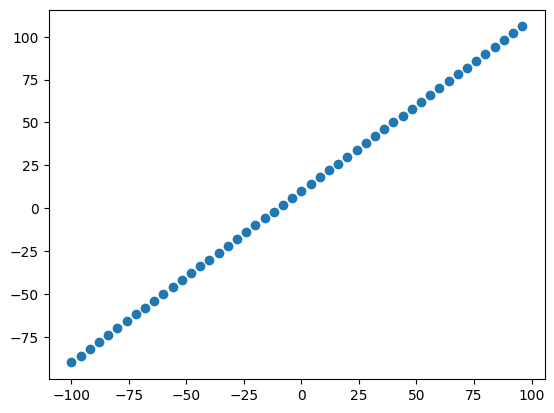

In [17]:
plt.scatter(X,y)

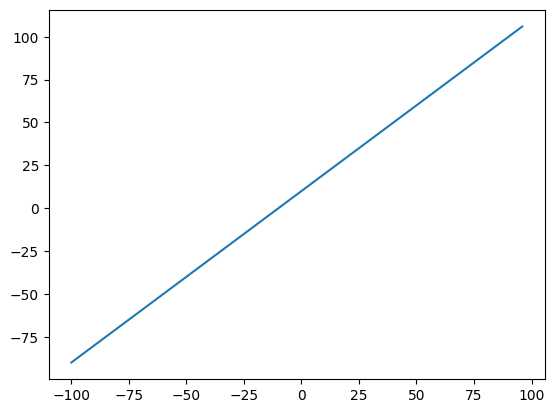

In [18]:
plt.plot(X,y)

##concepts of 3 sets

1.   you can start here again



split X and y to 80 percent training set 10-15 percent validation set
then 5 percent test set

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



X = tf.range(-100,100 , 4)
#-100 to 100 by 4
#make labels for the dataset
y = X + 10
y
len(X), X, y, len(y)

(50,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 50)

###splitting the datasets

In [20]:
#split the data into train set and the test sets
X_train = X[:40] #first 40 of the data 80 percent of the data
y_train = y[:40]


X_test = X[40:] #last 20 percent of the data from X
y_test = y[40:]

In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

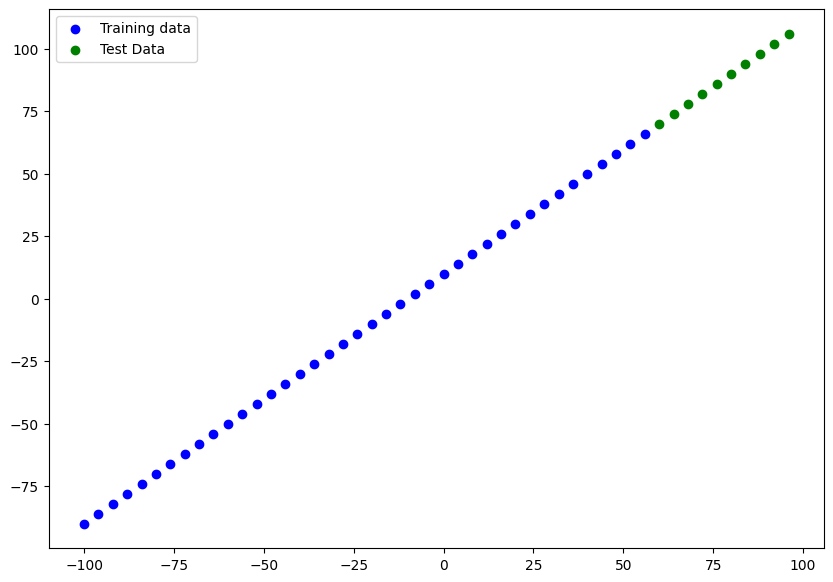

In [22]:
### visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = "b", label="Training data")
plt.scatter(X_test, y_test, c = "g", label="Test Data")
plt.legend()

In [23]:
#create the neural network here
# create the model first

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])


# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics="mae",
              loss = tf.keras.losses.MAE
              )

#model fittting

#model.fit()

In [24]:
X[0], y[0], X_train, y_train

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [25]:
#same as above
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "Model1")

model1.compile(optimizer=tf.keras.optimizers.SGD(),
               metrics="mae",
               loss=tf.keras.losses.mae)


In [26]:
model1.summary()
#another term for dense is fully connected layer
#

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________




*   total params : total number of parameters in the model
*  
trainable params: parameters / paterns model can update as trains.


*   non - trainable params : are parameters that was not updated during training


resource for trainable
-->





In [27]:
model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [28]:
model1.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


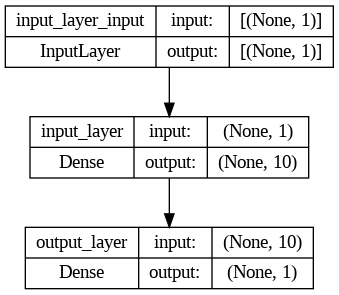

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model = model1, show_shapes=True)

In [30]:
### example problem assign
tf.random.set_seed(42)

xamp1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=[1], name = "input_layer"),
    #tf.keras.layers.Dense(1, input_shape=[1], name = "input_layer2"),
    #tf.keras.layers.Dense(100, input_shape=[1], name = "input_layer3"),
    tf.keras.layers.Dense(1, name = "output_layer"),
], name = "xamp1")

xamp1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = tf.keras.losses.mae, metrics="mae")

#model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

xamp1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1000,verbose=0 )


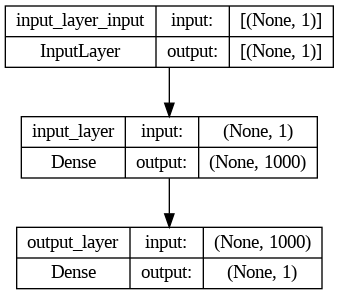

In [31]:
plot_model(model = xamp1, show_shapes=True)
#this is just visualizing the layers

In [32]:
xamp1P = xamp1.predict(X_test)
xamp1P

1/1 [==============================] - 0s 58ms/step


array([[ 69.93824 ],
       [ 73.93388 ],
       [ 77.92954 ],
       [ 81.92519 ],
       [ 85.920845],
       [ 89.9165  ],
       [ 93.91214 ],
       [ 97.907776],
       [101.903435],
       [105.89907 ]], dtype=float32)

In [33]:
xamp1.predict([100])

1/1 [==============================] - 0s 94ms/step


array([[109.89472]], dtype=float32)

###Visualizing the Models predictions

In [34]:
#ploting y_pred, vs y_test or y_true

In [35]:
y_test
#this is suppose to line up to the prediction above

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**If you feel to make a function for plotting in the future**

In [66]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = xamp1P
                     ):
  """
  Plots Training data, test Data and compares the predictions to ground truth
  """

  plt.figure(figsize=(10,7))
  #plot here
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #plot the other on green for the prediction or test
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  # plot the models predictions in red
  plt.scatter(test_data, predictions, c="r", label = "predictions")
  plt.legend();


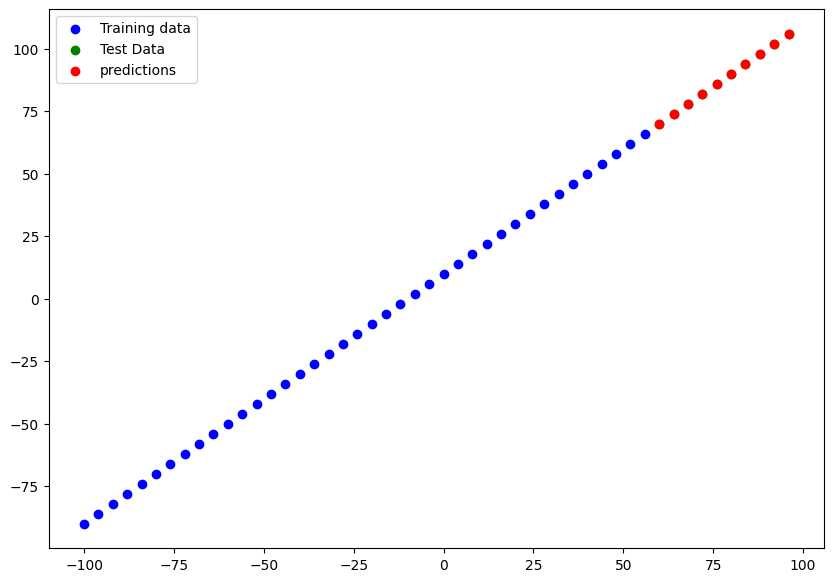

In [37]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = xamp1P
                 )

###Evaluating our models predictions with regression evaluation metrics

depending on the problem we are working on there are different metrics that we can perform to evaluate the models performance

now we are doing regression problems
* MAE -> mean absolute error -- on average how wrong is each of my models predictions

* MSE -> mean Square error -- we square the average errors



In [38]:
xamp1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 182ms/step - loss: 0.0813 - mae: 0.0813


[0.08133773505687714, 0.08133773505687714]

In [39]:
#mae
xamp1P

array([[ 69.93824 ],
       [ 73.93388 ],
       [ 77.92954 ],
       [ 81.92519 ],
       [ 85.920845],
       [ 89.9165  ],
       [ 93.91214 ],
       [ 97.907776],
       [101.903435],
       [105.89907 ]], dtype=float32)

In [40]:
#calculate the Mae here
#mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test ,y_pred = tf.squeeze(xamp1P))
#same result as xamp1.evaluate(X_test, y_test)
mae , xamp1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.0813 - mae: 0.0813


(<tf.Tensor: shape=(), dtype=float32, numpy=0.081337735>,
 [0.08133773505687714, 0.08133773505687714])

In [41]:
y_pred = xamp1P
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.93824 ],
       [ 73.93388 ],
       [ 77.92954 ],
       [ 81.92519 ],
       [ 85.920845],
       [ 89.9165  ],
       [ 93.91214 ],
       [ 97.907776],
       [101.903435],
       [105.89907 ]], dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
#calculate the mean square error

# here

mse = tf.metrics.mean_squared_error(y_test, y_pred = tf.squeeze(xamp1P))
#we use squeeze because if we put only xamp1P or y_pred it will return an array as it is tons of data we have to squeeze in
#we have to make a single dimension
mse

#typically it will be larger because of the formula that has square on it

<tf.Tensor: shape=(), dtype=float32, numpy=0.0067720516>

###function for the MAE AND MSE

In [44]:
#making function to calculate the MAE and MSE
def MAE(y_true , y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred = tf.squeeze(xamp1P));

In [45]:
def MSE(y_true , y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                        y_pred = tf.squeeze(xamp1P));

In [46]:
MSE(y_test , xamp1P)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0067720516>

In [47]:
MAE(y_test, xamp1P)

<tf.Tensor: shape=(), dtype=float32, numpy=0.081337735>

#Sample for review

In [48]:
from matplotlib.font_manager import X11FontDirectories
#review / redoing something
import tensorflow as tf
import numpy as np
import keras
from keras import *

tf.random.set_seed(42)

X1 = tf.range(-200,200,5)
y1 = X1 + 5

X1, y1

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-200, -195, -190, -185, -180, -175, -170, -165, -160, -155, -150,
        -145, -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,
         -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,
         -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,
          20,   25,   30,   35,   40,   45,   50,   55,   60,   65,   70,
          75,   80,   85,   90,   95,  100,  105,  110,  115,  120,  125,
         130,  135,  140,  145,  150,  155,  160,  165,  170,  175,  180,
         185,  190,  195], dtype=int32)>,
 <tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-195, -190, -185, -180, -175, -170, -165, -160, -155, -150, -145,
        -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,  -90,
         -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,
         -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,   20,
          25,   30,   35,   40,   45,   50,   55,   

In [49]:
X1_train = X1[:60]
y1_train = y1[:60]

X1_test = X1[60:]
y1_test = y1[60:]

X1_train, y1_train, X1_test, y1_test

(<tf.Tensor: shape=(60,), dtype=int32, numpy=
 array([-200, -195, -190, -185, -180, -175, -170, -165, -160, -155, -150,
        -145, -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,
         -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,
         -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,
          20,   25,   30,   35,   40,   45,   50,   55,   60,   65,   70,
          75,   80,   85,   90,   95], dtype=int32)>,
 <tf.Tensor: shape=(60,), dtype=int32, numpy=
 array([-195, -190, -185, -180, -175, -170, -165, -160, -155, -150, -145,
        -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,  -90,
         -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,
         -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,   20,
          25,   30,   35,   40,   45,   50,   55,   60,   65,   70,   75,
          80,   85,   90,   95,  100], dtype=int32)>,
 <tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([100, 1

In [50]:

modelsamp = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=[1], activation=None),
    tf.keras.layers.Dense(1)
])

modelsamp.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.mae,
                  metrics="mae")

modelsamp.fit(tf.expand_dims(X1_train, axis=-1), y1_train, epochs=1000, verbose=0)

In [51]:
predsamp = modelsamp.predict(X1_test)
predsamp

1/1 [==============================] - 0s 62ms/step


array([[105.056694],
       [110.05949 ],
       [115.062294],
       [120.065094],
       [125.067894],
       [130.07071 ],
       [135.07352 ],
       [140.0763  ],
       [145.07913 ],
       [150.08192 ],
       [155.08472 ],
       [160.08752 ],
       [165.09033 ],
       [170.09312 ],
       [175.09592 ],
       [180.09874 ],
       [185.10153 ],
       [190.10432 ],
       [195.10712 ],
       [200.10992 ]], dtype=float32)

In [52]:
def plot_predictions(train_data = X1_train,
                     train_labels = y1_train,
                     test_data = X1_test,
                     test_labels = y1_test,
                     predictions = predsamp
                     ):
  """
  Plots Training data, test Data and compares the predictions to ground truth
  """

  plt.figure(figsize=(10,7))
  #plot here
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #plot the other on green for the prediction or test
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  # plot the models predictions in red
  plt.scatter(test_data, predictions, c="r", label = "predictions")
  plt.legend();

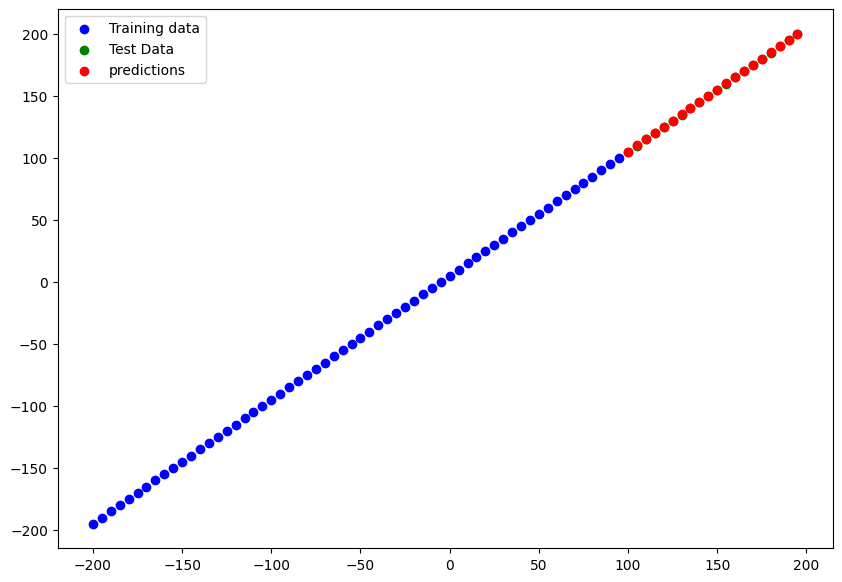

In [53]:
import matplotlib.pyplot as plt

plot_predictions()

#Setting up TensorFlow modelling experiments part 1

The machine learning practicioner motto

**Experiment Experiment Experiment**

1. get more data - get more examples for your model to train on

2. make your model more larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. train for longer - give model more of a chance to find the patterns in the data.


lets make models for this
1. model1 - 1layer , 100 epochs
2. model2 - 2layers, trained for 100 epochs
3. model3 - 2 layers, trained for 500 epochs

In [54]:
X_train, y_train , X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [55]:
#always set random seed first
tf.random.set_seed(42)

model1_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1_1.compile(optimizer=tf.keras.optimizers.SGD(),
                 loss=tf.keras.losses.mae,
                 metrics=["mae"])

model1_1.fit(tf.expand_dims(X_train, axis=-1), y_train , epochs=100, verbose=0)

In [56]:
model1_1_pred = model1_1.predict(X_test)
model1_1_pred, y_test

1/1 [==============================] - 0s 54ms/step


(array([[44.47936 ],
        [47.357525],
        [50.23569 ],
        [53.113857],
        [55.992023],
        [58.87019 ],
        [61.748352],
        [64.62652 ],
        [67.50469 ],
        [70.38285 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

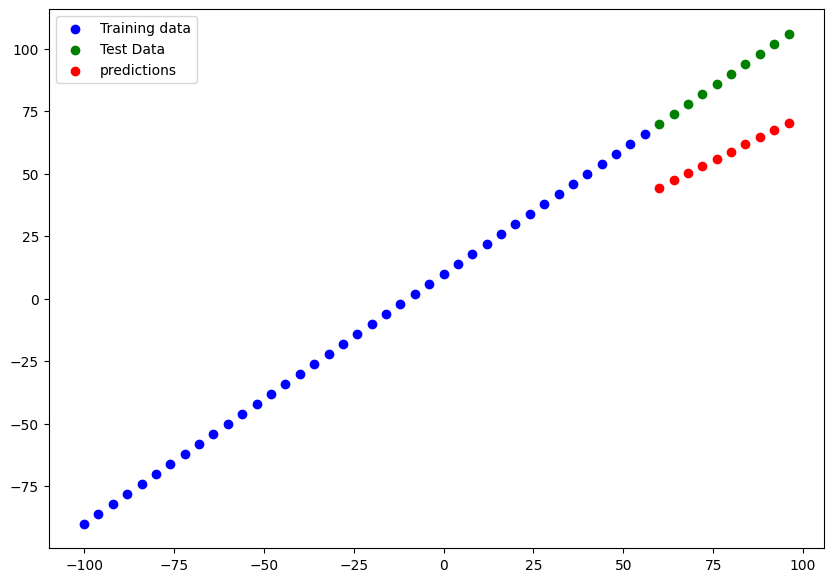

In [68]:
plot_predictions(predictions= model1_1_pred)

In [61]:
mse1_1 = MSE(y_test, tf.squeeze(model1_1_pred))
mae1_1 = MAE(y_test, tf.squeeze(model1_1_pred))
mse1_1, mae1_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0067720516>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.081337735>)

**Model number 2**

2 dense layer trained for 100epochs

In [62]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer = tf.keras.optimizers.SGD(),
               loss = tf.keras.losses.mae,
               metrics=["mae"])
model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)


In [63]:
model2_pred = model2.predict(X_test)
model2_pred

1/1 [==============================] - 0s 67ms/step


array([[ 69.48303 ],
       [ 73.99957 ],
       [ 78.51611 ],
       [ 83.03265 ],
       [ 87.5492  ],
       [ 92.06574 ],
       [ 96.582275],
       [101.098816],
       [105.615364],
       [110.13189 ]], dtype=float32)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0067720516>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.081337735>)

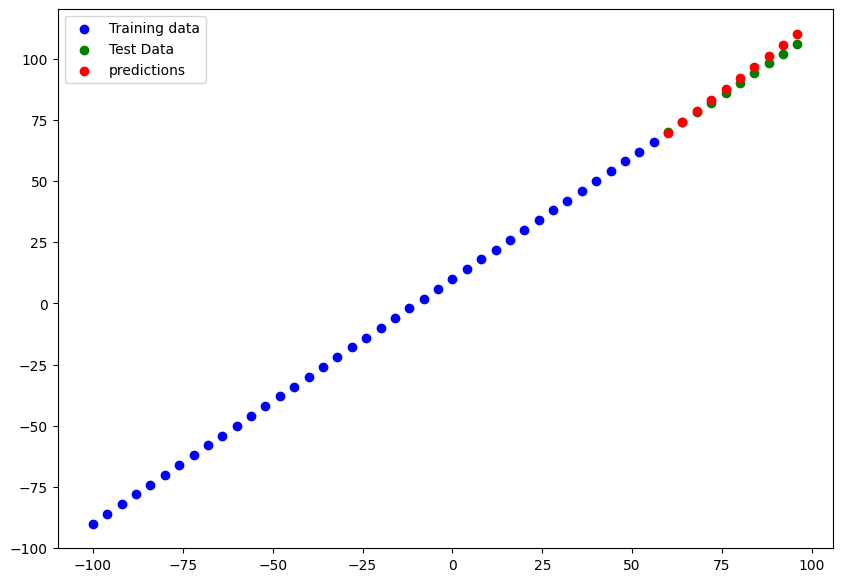

In [69]:
plot_predictions(predictions=model2_pred)
#basically comparing the y_true to y_pred
mse2 = MSE(y_test, tf.squeeze(model2_pred))
mae2 = MAE(y_test, tf.squeeze(model2_pred))
mse2, mae2

**Model 3**

2 layers and 500 epochs

1/1 [==============================] - 0s 85ms/step


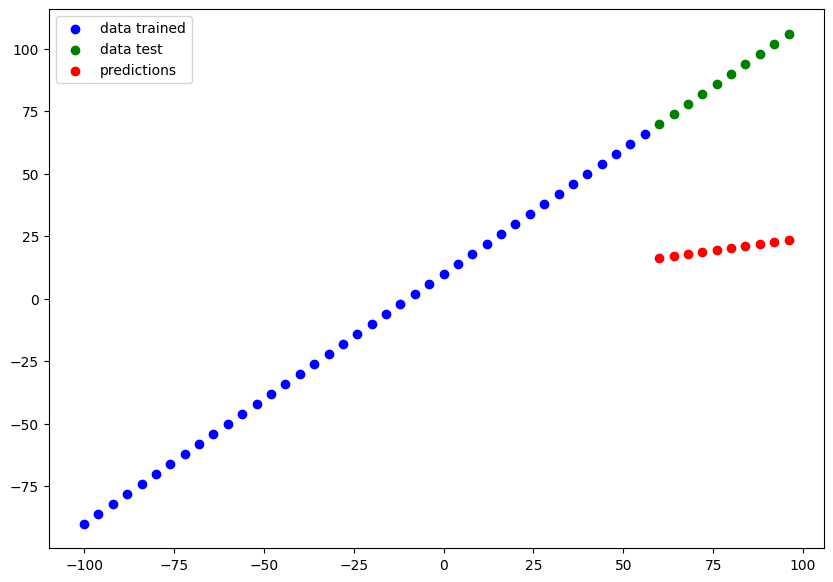

In [70]:
import matplotlib.pyplot as plt


tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model3.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)

model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

model3_pred = model3.predict(X_test)

def plotter(train_data = X_train,
            label_data = y_train,
            test_data = X_test,
            label_test = y_test,
            pred = model3_pred):

  #always x first
  plt.figure(figsize=(10,7));
  plt.scatter(train_data, label_data, c="b" , label="data trained")
  plt.scatter(test_data, label_test, c="g" , label="data test")
  plt.scatter(test_data, pred, c="r" , label="predictions")
  plt.legend()

plotter()

###Comparing the results of our experiments

In [71]:
import numpy as np
import pandas as pd

model_results = [["model1_1"]]


## Saving tensor models

saving them allow us to use them outside of google colab
or whatever they we trained for? ,

**Ways to save the models**

1.   The savemodel format
2.   The HDF5 format



In [72]:
xamp1.save("almost_perfect_prediction_xamp1")